# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [3]:
import pandas as pd
import numpy as np

# your answer here
#[Pandas Pivot Table](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.pivot_table.html)

#[Correlation and Dependance](https://en.wikipedia.org/wiki/Correlation_and_dependence)

#[Google Search](https://www.google.com/search?q=pandas+python)



# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [43]:
# your answer here
from pathlib import Path

data_folder = Path('/Users/beatrizrenault/Documents/IH_DATA/WEEK 4/LABs WEEK 4/lab-pivot-table-and-correlation/your_code/data/')
file_to_open = data_folder / "Employee.csv"
employee = pd.read_csv(file_to_open)

len(employee)
employee.head(10)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [9]:
# Method 1
# your answer here
employee[['Department','Salary']].groupby('Department').mean()

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [12]:
# Method 2
# your answer here
employee_mean = pd.pivot_table(employee, values=['Salary'], 
                               index=['Department'],
                               aggfunc={ 'Salary' : np.mean})

employee_mean

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [15]:
# your answer here
employee_mean = pd.pivot_table(employee, values=['Salary'], 
                               index=['Department', 'Title'],
                               aggfunc={ 'Salary' : np.mean})

employee_mean

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [21]:
# your answer here

'''
pandas.pivot_table(data, values=None, index=None, columns=None, aggfunc='mean', 
fill_value=None, margins=False, dropna=True, margins_name='All', observed=False) → 'DataFrame'
'''

#work_exp = pd.pivot_table(employee, values= 'Salary', index= ('Department','Title'), columns= 'Years', aggfunc='mean')
work_exp = pd.pivot_table(employee, values= 'Salary', index= ('Title'), columns= 'Years', aggfunc='mean')
work_exp

Years,1,2,3,4,7,8
Title,,,,,,
VP,NaN,NaN,NaN,NaN,NaN,70.0
analyst,35.0,30.0,NaN,35.0,NaN,NaN
associate,NaN,55.0,55.0,NaN,60.0,NaN


#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [32]:
work_exp = pd.pivot_table(employee, values= 'Salary', index= ('Title', 'Department'), 
                          aggfunc= {'Salary': 'mean', 'Title': 'count'})
work_exp

Salary  Title
Title     Department               
VP        HR            70.0      1
          IT            70.0      1
analyst   HR            32.5      2
          IT            32.5      2
associate IT            60.0      1
          Sales         55.0      2

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [37]:
# your answer here
work_exp = pd.pivot_table(employee, values= 'Salary', index= ('Title', 'Department'), 
                          aggfunc= {'Salary': ["min", "median", "max", 'std']})
work_exp

'''


max  median   min       std
Title     Department                              
VP        HR          70.0    70.0  70.0       NaN
          IT          70.0    70.0  70.0       NaN
analyst   HR          35.0    32.5  30.0  3.535534
          IT          35.0    32.5  30.0  3.535534
associate IT          60.0    60.0  60.0       NaN
          Sales       55.0    55.0  55.0  0.000000

#### Based on your comments, fill the missing values with an appropriate value.

In [55]:
# your answer here
#Standard Deviation is not fillable because there is only one element. 
# I wouldn't fill anything, there is not enough data. But maybe I would like to see at least one line for each title, 
#so I would add this titles per department with null.

#employee['Years'].corr(employee['Salary'])

In [53]:
employee.head(10)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [58]:
# your answer here

work_numb = pd.pivot_table(employee, values= 'Salary', index = 'Department',
                          aggfunc= {'Salary': 'sum', 'Department': 'count'})
work_numb

,Department,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [68]:
# your answer here

work_tot = pd.pivot_table(employee, values= ('Salary', 'Years'), index= ('Department','Title'),
                          aggfunc= {'Salary': 'mean','Years': 'sum'})
work_tot

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [ ]:
# your answer here


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [69]:
# your answer here
fitbit = pd.read_csv('/Users/beatrizrenault/Documents/IH_DATA/DATASETS/Fitbit.csv')
fitbit

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,03-05-2016,3796,18588,14.13,16,599.000,275,49,79,236,377,33,18,410
363,04-05-2016,3525,16382,12.39,16,684.000,333,10,55,2075,406,21,8,427
364,05-05-2016,3649,21913,16.40,19,701.000,287,29,90,2249,280,35,15,315
365,06-05-2016,3539,19023,14.79,15,575.000,298,8,85,2112,370,42,22,412


#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [73]:
# your answer here
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [74]:
# your answer here
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [76]:
# your answer here
fitbit['Minutes Very Active'].corr(fitbit['Steps'])

0.5714518481062608

#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

Text(0, 0.5, 'Steps')

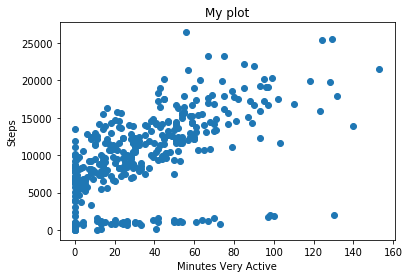

In [79]:
# your answer here
import matplotlib.pyplot as plt
plt.scatter(x=fitbit['Minutes Very Active'], y=fitbit['Steps'])
plt.title('My plot')
plt.xlabel('Minutes Very Active')
plt.ylabel('Steps')


#### What can you say about Minute Very Active and Steps? Write a comment below

In [ ]:
# your answer here
#Seems they are correlated, maybe more than 0.57.
#the thing is there are some zero values that could be bringing this correlation down.
# I would have to check them.

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [81]:
# your answer here

fitbit['Minutes Sedentary'].corr(fitbit['Steps'])


0.07690608062990091

#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

Text(0, 0.5, 'Steps')

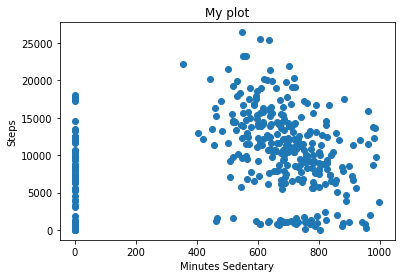

In [83]:
# your answer here
plt.scatter(x=fitbit['Minutes Sedentary'], y=fitbit['Steps'])
plt.title('My plot')
plt.xlabel('Minutes Sedentary')
plt.ylabel('Steps')

#According with numbers and plot, no correlation. 
# But I would risk a negative correlation after data cleaning. 

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [84]:
# your answer here
fitbit['MinutesOfSleep'].corr(fitbit['Steps'])

0.1309856595083638

#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

Text(0, 0.5, 'Steps')

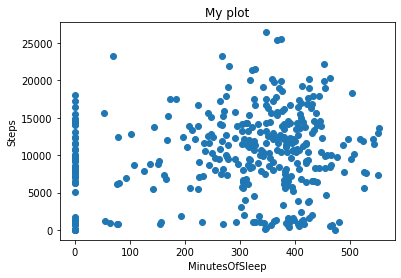

In [85]:
# your answer here
plt.scatter(x=fitbit['MinutesOfSleep'], y=fitbit['Steps'])
plt.title('My plot')
plt.xlabel('MinutesOfSleep')
plt.ylabel('Steps')
#no correlation. and this time, I kind of agree.

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [88]:
# your answer here
corr_fitbit = pd.DataFrame(fitbit,columns=['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep'])
corr_fitbit = corr_fitbit.corr()
corr_fitbit

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [92]:
# your answer here
corr_fitbit.sort_values('Steps', ascending = False)
#is Minutes Very Active.

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242


# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [95]:
# your answer here
time_grades = pd.read_csv('/Users/beatrizrenault/Documents/IH_DATA/WEEK 4/LABs WEEK 4/lab-pivot-table-and-correlation/your_code/data/Time_Grades.csv')
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

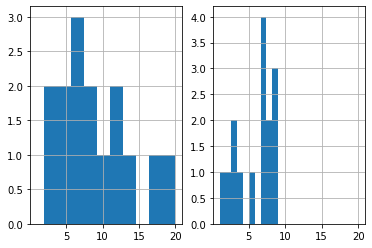

In [104]:
# your answer here
#matplotlib.pyplot.hist(x, bins=None, range=None, density=None, weights=None, cumulative=False, 
#bottom=None, histtype='bar', align='mid', orientation='vertical', rwidth=None, log=False, color=None, 
#label=None, stacked=False, normed=None, *, data=None, **kwargs)[source]

fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True)
time_grades["Study time"].hist(ax = ax1)
time_grades["Grade"].hist(ax = ax2)

#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [107]:
# your answer here
a= time_grades[["Study time", "Grade"]].corr(method = "pearson")
b = time_grades[["Study time", "Grade"]].corr(method = "spearman")
print(a)
print(b)

'''
The difference between the Pearson correlation and the Spearman correlation is that 
the Pearson is most appropriate for measurements taken from an interval scale
('one where the difference between two values is meaningful' - as fitbit), 
while the Spearman is more appropriate for measurements taken from ordinal scales 
('order matters but not the difference between values').
'''


            Study time     Grade
Study time    1.000000  0.798046
Grade         0.798046  1.000000
            Study time     Grade
Study time    1.000000  0.819659
Grade         0.819659  1.000000


#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

Text(0, 0.5, 'Grade')

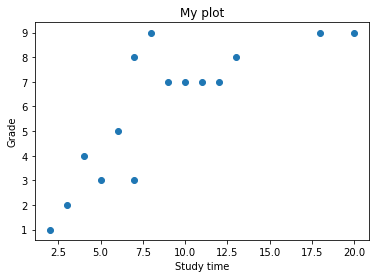

In [108]:
# your answer here
plt.scatter(x=time_grades['Study time'], y=time_grades['Grade'])
plt.title('My plot')
plt.xlabel('Study time')
plt.ylabel('Grade')

#correlated with some plateaus.
#If you want a decent grade, you have to study from 7 to 13hours.

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [ ]:
# your answer here
'''
The difference between the Pearson correlation and the Spearman correlation is that 
the Pearson is most appropriate for measurements taken from an interval scale
('one where the difference between two values is meaningful' - as fitbit), 
while the Spearman is more appropriate for measurements taken from ordinal scales 
('order matters but not the difference between values').
'''